In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
#import datatime as dt
sns.set()

In [104]:
listaSP500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

In [105]:
List = listaSP500[0]


In [106]:
#conversion a dataframe lista = listaSP500_df[0]
#descarga de datos por symbol 
EmpresaData = pd.DataFrame() 
for i in List.Symbol: 
    dato_simbol = yf.download(i, start='2000-01-01', end='2021-12-31') 
    dato_simbol['Symbol'] = i  
    EmpresaData = pd.concat([dato_simbol, EmpresaData]) 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [107]:
EmpresaData.reset_index(inplace=True)

In [108]:
EmpresaData  = EmpresaData.rename(columns={'Adj Close':'Cierre_Ajustado'})

In [109]:
CopyEmpresaData = EmpresaData.copy()

In [110]:
EmpresaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467097 entries, 0 to 2467096
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Date             datetime64[ns]
 1   Open             float64       
 2   High             float64       
 3   Low              float64       
 4   Close            float64       
 5   Cierre_Ajustado  float64       
 6   Volume           float64       
 7   Symbol           object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 150.6+ MB


In [111]:
List.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   SEC filings            503 non-null    object
 3   GICS Sector            503 non-null    object
 4   GICS Sub-Industry      503 non-null    object
 5   Headquarters Location  503 non-null    object
 6   Date first added       458 non-null    object
 7   CIK                    503 non-null    int64 
 8   Founded                503 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.5+ KB


In [112]:
#Se realiza una columna por dias, años, meses
EmpresaData['Day'] =EmpresaData['Date'].dt.day_name() # para acar el dia
EmpresaData['Year']  = pd.DatetimeIndex(EmpresaData['Date']).year # para acar el año
EmpresaData['Mes']  = pd.DatetimeIndex(EmpresaData['Date']).month # para acar el mes
EmpresaData.reset_index(inplace= True, drop=True)
EmpresaData

,Date,Open,High,Low,Close,Cierre_Ajustado,Volume,Symbol,Day,Year,Mes
0,2013-02-01,31.500000,31.740000,30.469999,31.010000,29.067736,66789100.0,ZTS,Friday,2013,2
1,2013-02-04,31.090000,31.990000,30.760000,31.020000,29.077122,7695400.0,ZTS,Monday,2013,2
2,2013-02-05,31.250000,31.980000,30.850000,31.040001,29.095865,5013200.0,ZTS,Tuesday,2013,2
3,2013-02-06,30.980000,31.430000,30.750000,31.030001,29.086493,2126100.0,ZTS,Wednesday,2013,2
4,2013-02-07,31.000000,32.730000,31.000000,32.000000,29.995741,3800800.0,ZTS,Thursday,2013,2
...,...,...,...,...,...,...,...,...,...,...,...
2467092,2021-12-23,172.990005,175.619995,172.779999,174.970001,171.561081,1955700.0,MMM,Thursday,2021,12
2467093,2021-12-27,175.149994,176.729996,174.910004,176.699997,173.257355,1183000.0,MMM,Monday,2021,12
2467094,2021-12-28,176.839996,178.500000,176.750000,177.639999,174.179047,1618900.0,MMM,Tuesday,2021,12
2467095,2021-12-29,177.479996,178.889999,177.229996,178.410004,174.934052,1221900.0,MMM,Wednesday,2021,12


In [89]:
#Validar valore nulos
EmpresaData.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Cierre_Ajustado    0
Volume             0
Symbol             0
Day                0
Year               0
Mes                0
dtype: int64

In [90]:
#Validar valore nulos
List.isnull().sum()

Symbol                    0
Security                  0
SEC filings               0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date first added         45
CIK                       0
Founded                   0
dtype: int64

retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)

retornos_intra = np.log(cierres/aperturas).fillna(0)

variaciones = activo.cierre_ajustado.pct_change()

volatilidad = activos.variaciones.rolling(250).std()100(250)**0.5 (en este caso se puede utilizar el indice VIX)

In [113]:
# Retorno Gaps
EmpresaData['Retorno_Gaps'] = np.log(EmpresaData['Open'] / EmpresaData['Close'].shift(1)).fillna(0)

In [114]:
#Retorno Intra
EmpresaData['Retorno_Intra'] = np.log(EmpresaData['Open'] / EmpresaData['Close']).fillna(0)

In [115]:
# variaciones 
EmpresaData['Variaciones'] = EmpresaData.Cierre_Ajustado.pct_change()

In [116]:
# volatilidad
EmpresaData['Volatilidad'] = EmpresaData.Variaciones.rolling(250).std()*100*(250)**0.5

In [117]:
# copiar Datafrmae por si se requiere el analisis con valores nulos
analisis=EmpresaData.copy()

In [149]:
EmpresasData=EmpresaData.fillna(0)

In [151]:
EmpresasData

,Date,Open,High,Low,Close,Cierre_Ajustado,Volume,Symbol,Day,Year,Mes,Retorno_Gaps,Retorno_Intra,Variaciones,Volatilidad
0,2013-02-01,31.500000,31.740000,30.469999,31.010000,29.067736,66789100.0,ZTS,Friday,2013,2,0.000000,0.015678,0.000000,0.000000
1,2013-02-04,31.090000,31.990000,30.760000,31.020000,29.077122,7695400.0,ZTS,Monday,2013,2,0.002576,0.002254,0.000323,0.000000
2,2013-02-05,31.250000,31.980000,30.850000,31.040001,29.095865,5013200.0,ZTS,Tuesday,2013,2,0.007387,0.006743,0.000645,0.000000
3,2013-02-06,30.980000,31.430000,30.750000,31.030001,29.086493,2126100.0,ZTS,Wednesday,2013,2,-0.001935,-0.001613,-0.000322,0.000000
4,2013-02-07,31.000000,32.730000,31.000000,32.000000,29.995741,3800800.0,ZTS,Thursday,2013,2,-0.000967,-0.031749,0.031260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467092,2021-12-23,172.990005,175.619995,172.779999,174.970001,171.561081,1955700.0,MMM,Thursday,2021,12,0.002025,-0.011381,0.013496,18.549154
2467093,2021-12-27,175.149994,176.729996,174.910004,176.699997,173.257355,1183000.0,MMM,Monday,2021,12,0.001028,-0.008811,0.009887,18.567209
2467094,2021-12-28,176.839996,178.500000,176.750000,177.639999,174.179047,1618900.0,MMM,Tuesday,2021,12,0.000792,-0.004514,0.005320,18.573704
2467095,2021-12-29,177.479996,178.889999,177.229996,178.410004,174.934052,1221900.0,MMM,Wednesday,2021,12,-0.000901,-0.005226,0.004335,18.574596


Cual es el mejor dia para invertir teniendo en cuenta el retorno del movimiento gap

In [161]:
df_Retorno_Gaps = EmpresasData[['Date','Symbol','Retorno_Gaps']].groupby([EmpresasData['Date'].dt.day_name(),EmpresasData['Symbol']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,Date,Symbol,Retorno_Gaps
0,Friday,A,-0.274303
1,Friday,AAL,0.600088
2,Friday,AAP,0.443362
3,Friday,AAPL,-0.588972
4,Friday,ABBV,0.329285
...,...,...,...
2495,Wednesday,YUM,-0.449482
2496,Wednesday,ZBH,-0.931358
2497,Wednesday,ZBRA,-0.720191
2498,Wednesday,ZION,-0.002203


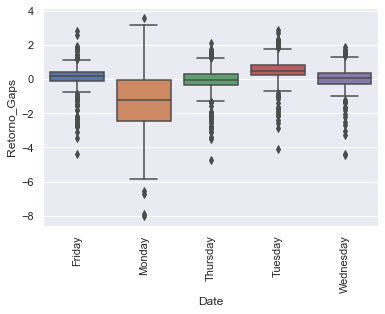

In [162]:
sns.boxplot(data =df_Retorno_Gaps,x='Date',y='Retorno_Gaps')
plt.xticks(rotation=90)
plt.show()

Cual es el mejor dia para invertir teniendo en cuenta el retorno de los movimientos intradiarios

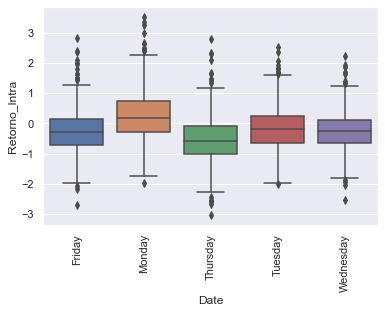

In [164]:
df_Retorno_Intra = EmpresasData[['Date','Symbol','Retorno_Intra']].groupby([EmpresasData['Date'].dt.day_name(),EmpresasData['Symbol']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='Date',y='Retorno_Intra')
plt.xticks(rotation=90)
plt.show()

(array([  8.,  38., 229., 719., 886., 406., 144.,  48.,  18.,   4.]),
 array([-3.01926016, -2.36513525, -1.71101033, -1.05688542, -0.40276051,
         0.25136441,  0.90548932,  1.55961423,  2.21373915,  2.86786406,
         3.52198897]),
 <BarContainer object of 10 artists>)

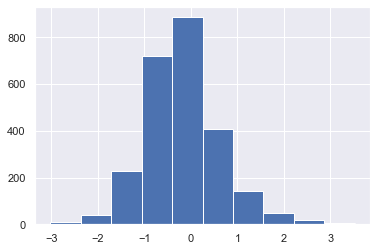

In [167]:
import matplotlib.pyplot as plt

plt.hist(df_Retorno_Intra['Retorno_Intra'])

Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir

In [168]:
df_Empresa= pd.merge(EmpresasData, List, on=['Symbol'], how='inner')
df_Empresa.drop(['Security','SEC filings','GICS Sub-Industry','Headquarters Location','Founded','CIK', 'Date first added'], axis = 1, inplace = True)
df_mask=df_Empresa['GICS Sector']=='Industrials'
filtered_df = df_Empresa[df_mask]
filtered_df

,Date,Open,High,Low,Close,Cierre_Ajustado,Volume,Symbol,Day,Year,Mes,Retorno_Gaps,Retorno_Intra,Variaciones,Volatilidad,GICS Sector
23992,2011-10-13,23.500000,24.270000,23.000000,24.250000,20.914484,396800.0,XYL,Thursday,2011,10,-1.773075,-0.031416,-0.847419,86.751149,Industrials
23993,2011-10-14,24.360001,25.490000,24.360001,25.350000,21.863190,402600.0,XYL,Friday,2011,10,0.004526,-0.039836,0.045361,86.878107,Industrials
23994,2011-10-17,25.500000,25.799999,25.160000,25.160000,21.699318,583400.0,XYL,Monday,2011,10,0.005900,0.013423,-0.007495,86.878032,Industrials
23995,2011-10-18,25.059999,25.360001,24.900000,25.240000,21.768312,423500.0,XYL,Tuesday,2011,10,-0.003982,-0.007157,0.003180,86.863444,Industrials
23996,2011-10-19,25.250000,25.350000,24.750000,24.750000,21.345707,722200.0,XYL,Wednesday,2011,10,0.000396,0.020001,-0.019414,86.877918,Industrials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467092,2021-12-23,172.990005,175.619995,172.779999,174.970001,171.561081,1955700.0,MMM,Thursday,2021,12,0.002025,-0.011381,0.013496,18.549154,Industrials
2467093,2021-12-27,175.149994,176.729996,174.910004,176.699997,173.257355,1183000.0,MMM,Monday,2021,12,0.001028,-0.008811,0.009887,18.567209,Industrials
2467094,2021-12-28,176.839996,178.500000,176.750000,177.639999,174.179047,1618900.0,MMM,Tuesday,2021,12,0.000792,-0.004514,0.005320,18.573704,Industrials
2467095,2021-12-29,177.479996,178.889999,177.229996,178.410004,174.934052,1221900.0,MMM,Wednesday,2021,12,-0.000901,-0.005226,0.004335,18.574596,Industrials


   Symbol  Retorno_Gaps    Volatilidad
0     AAL      6.182310  254543.784321
25     GE      4.347321  212753.509264
13    DAL      3.256335  183407.819440
58    RTX      2.375537  156422.274510
29    HON      2.130193  158029.920981
65    UAL      1.820956  239342.521632
14     DE      1.323855  182678.551641
7     CAT      0.801911  185605.041362
45    NOC      0.763561  137305.803583
68    URI      0.454356  286073.364684
50     PH      0.425849  184481.048945
15    DOV      0.388827  166510.400500
9     CMI      0.297533  213599.924432
2    ALLE      0.234894   52294.095219
26   GNRC      0.083686  129171.884447
18    ETN      0.074559  175563.282358
1     ALK      0.050875  251259.288457


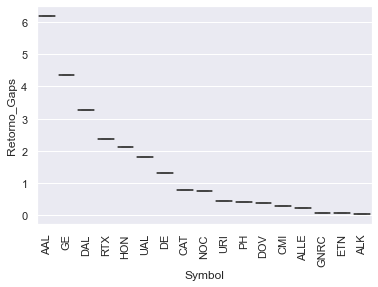

In [198]:
df_Mejor_Industria = filtered_df[['Symbol','Retorno_Gaps','Volatilidad']].groupby([filtered_df['Symbol']]).sum()
df_Mejor_Industria.reset_index(inplace=True)
df_Mejor_Industria.sort_values(by=['Retorno_Gaps'], inplace=True, ascending=False)
df_Mejor_Industria=df_Mejor_Industria.head(17)
print(df_Mejor_Industria)
sns.boxplot(data =df_Mejor_Industria,x='Symbol',y='Retorno_Gaps')
plt.xticks(rotation=90)
plt.show()





c:\Users\LENOVO\Documents\Python\prueba\env\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


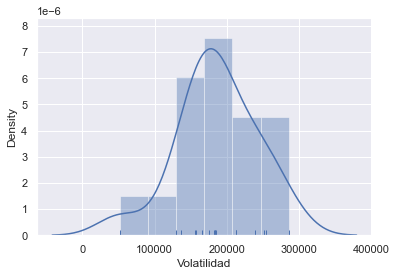

In [196]:
sns.distplot(df_Mejor_Industria.Volatilidad, hist=True, kde=True, rug=True)
plt.show()

Cuales fueron los momentos de alta volatilidad que afectaron al SP500

In [156]:
df_volatilidad = df_Empresa[['Date','Symbol','Volatilidad']].groupby([df_Empresa['Date'].dt.year,df_Empresa['Symbol']]).sum()
df_volatilidad.reset_index(inplace=True)
df_volatilidad

,Date,Symbol,Volatilidad
0,2000,A,29442.005672
1,2000,AAPL,29545.252608
2,2000,ABC,28035.939265
3,2000,ABMD,30374.887368
4,2000,ABT,24630.534518
...,...,...,...
9868,2021,YUM,6341.490178
9869,2021,ZBH,8201.091583
9870,2021,ZBRA,8701.503074
9871,2021,ZION,12439.771973


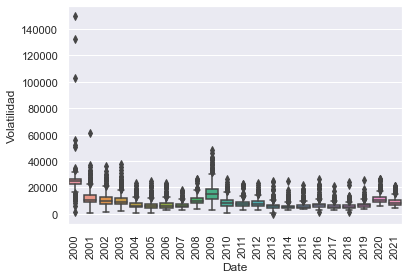

In [157]:
sns.boxplot(data =df_volatilidad,x='Date',y='Volatilidad')
plt.xticks(rotation=90)
plt.show()

Cuales son las 9 mejores empresas para invertir

In [225]:
EmpresasData.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Cierre_Ajustado           float64
Volume                    float64
Symbol                     object
Day                        object
Year                        int64
Mes                         int64
Retorno_Gaps              float64
Retorno_Intra             float64
Variaciones               float64
Volatilidad               float64
dtype: object

In [ ]:
import Plotly 

    Symbol  Mayor_Valor    Volatilidad
173      F     7.368712  221864.370114
18     AIG     4.196989  272106.438452
72       C     3.783881  305314.568940
1      AAL     3.280399  254543.784321
279    LVS     3.170052  218958.967848
318     MU     2.812293  305407.988959
295    MGM     2.146325  276286.443959
194     GE     1.712797  212753.509264
464    VLO     1.586121  232077.283257


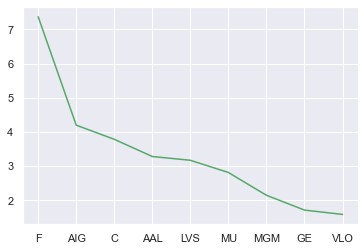

In [274]:
# Crea columna para hallar el mayor valor de la resta entre Gaps y variaciones
EmpresasData['Mayor_Valor'] = EmpresasData['Retorno_Gaps']-EmpresasData['Variaciones']
Mejor_Empresa = EmpresasData[['Symbol','Mayor_Valor','Volatilidad']].groupby([ EmpresasData['Symbol']]).sum() #EmpresasData['Symbol'],

Mejor_Empresa.reset_index(inplace=True)
Mejor_Empresa.sort_values(by=['Mayor_Valor','Volatilidad'], inplace=True, ascending=False)
Mejor_Empresa=Mejor_Empresa.head(9)
print(Mejor_Empresa)
plt.plot(Mejor_Empresa.Symbol, Mejor_Empresa.Mayor_Valor, "g-")
plt.show()

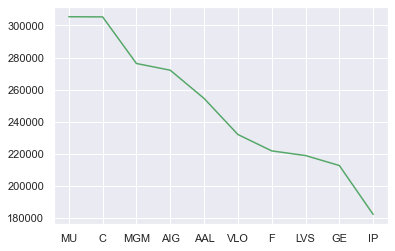

In [253]:
import matplotlib.pyplot as plot
import seaborn as sb

Mejor_Empresa.sort_values(by=['Volatilidad'], inplace=True, ascending=False)
plt.plot(Mejor_Empresa.Symbol, Mejor_Empresa.Volatilidad, "g-")
plt.show()


c:\Users\LENOVO\Documents\Python\prueba\env\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


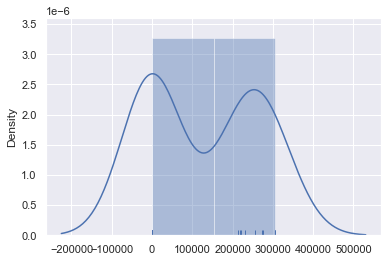

In [279]:
sns.distplot([Mejor_Empresa.Volatilidad, Mejor_Empresa.Mayor_Valor], hist=True, kde=True, rug=True)
plt.show()

(array([3., 0., 1., 0., 1., 0., 2., 0., 0., 2.]),
 array([212753.50926433, 222018.95723379, 231284.40520326, 240549.85317272,
        249815.30114219, 259080.74911165, 268346.19708112, 277611.64505058,
        286877.09302005, 296142.54098951, 305407.98895898]),
 <BarContainer object of 10 artists>)

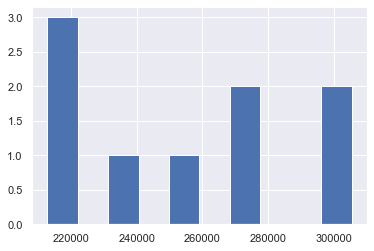

In [280]:
import matplotlib.pyplot as plt

plt.hist(Mejor_Empresa['Volatilidad'])

(array([3., 1., 2., 2., 1., 0., 0., 0., 0., 1.]),
 array([1.43862819, 2.03163653, 2.62464486, 3.2176532 , 3.81066153,
        4.40366987, 4.9966782 , 5.58968654, 6.18269487, 6.77570321,
        7.36871154]),
 <BarContainer object of 10 artists>)

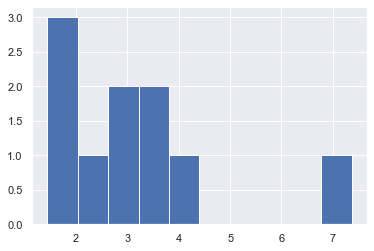

In [259]:
import matplotlib.pyplot as plt

plt.hist(Mejor_Empresa['Mayor_Valor'])

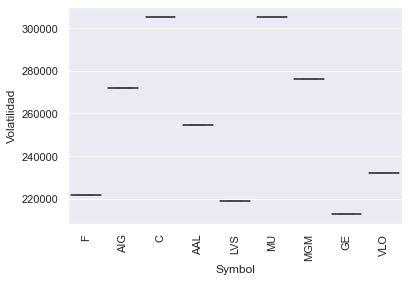

In [263]:
sns.boxplot(data =Mejor_Empresa,x='Symbol',y='Volatilidad')
plt.xticks(rotation=90)
plt.show()